In [53]:
# Importing dataset
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
train.shape

(891, 12)

In [57]:
test.shape

(418, 11)

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [60]:
# Age, Cabin, Embarked have missing values

In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [62]:
# Age, fare, cabin have missing values

In [63]:
# Visualize and preprocess train data

In [64]:
survived = train[train['Survived']==1]
not_survived = train[train['Survived']==0]

In [65]:
# VISUALIZATION OF 'SURVIVED'
# We know majority people don't survive
# Data is imbalace
train.Survived.value_counts()


0    549
1    342
Name: Survived, dtype: int64

Text(0,0.5,'Passenger Count')

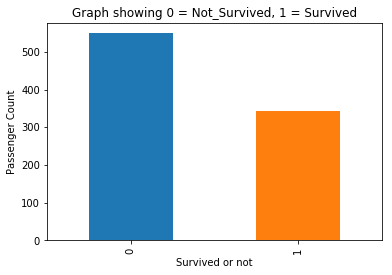

In [66]:
plt = train.Survived.value_counts().plot('bar', title = "Graph showing 0 = Not_Survived, 1 = Survived")
plt.set_xlabel('Survived or not')
plt.set_ylabel('Passenger Count')

In [67]:
# Pclass Study
# How many passengers were there in each class
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [68]:
# Number of Passenger at Class3 > Class1 > Class2

Text(0,0.5,'Passenger Count')

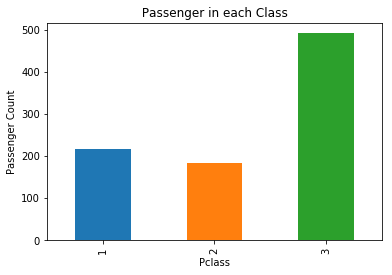

In [69]:
# Majority of them are from 3rd Class
plt = train.Pclass.value_counts().sort_index().plot('bar', title = " Passenger in each Class ")
plt.set_xlabel('Pclass')
plt.set_ylabel('Passenger Count')

In [70]:
# Class of priority who were given priority( Class1- richer class followed by 2 and 3)
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

Text(0,0.5,'Survival Probability')

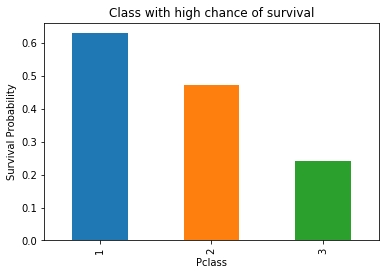

In [71]:
# From above data we can see 1st Class has high chance of Surviving than other two class
plt = train.groupby('Pclass').mean().Survived.plot('bar', title= 'Class with high chance of survival')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

In [72]:
train[['Pclass','Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [73]:
train[['Pclass','Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


Text(0,0.5,'Passenger Count')

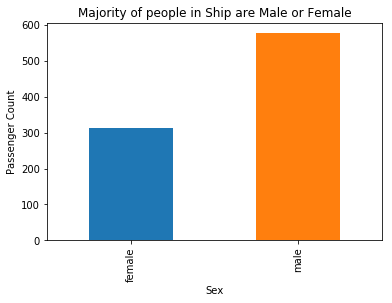

In [74]:
# SEX data Study
# Majority of them are male
plt = train.Sex.value_counts().sort_index().plot('bar', title='Majority of people in Ship are Male or Female')
plt.set_xlabel('Sex')
plt.set_ylabel('Passenger Count')

In [75]:
 # Check how many  male and femal survived in the accident
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [76]:
# 75% female and 25% male survived in the accident 

Text(0,0.5,'Survival Probability')

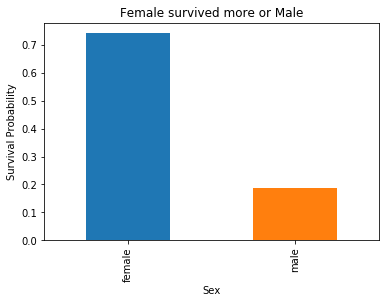

In [77]:
# Sex-Survival Probability
# Survival probability of female is more
plt = train[['Sex','Survived']].groupby('Sex').mean().Survived.plot('bar', title = 'Female survived more or Male')
plt.set_xlabel('Sex')
plt.set_ylabel('Survival Probability')

In [78]:
# Embarked Data Study
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Text(0,0.5,'Passenger Count')

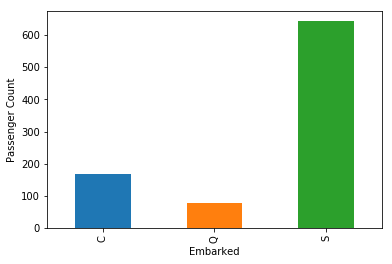

In [79]:
#Most of them are from Southampton(S)
plt = train.Embarked.value_counts().sort_index().plot('bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Passenger Count')

In [80]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

Text(0,0.5,'Survival Probability')

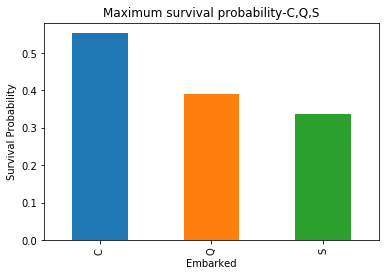

In [81]:
#Embarked - Survival probability
#Survival probability: C > Q > S
plt = train.groupby('Embarked').mean().Survived.plot('bar', title='Maximum survival probability-C,Q,S')
plt.set_xlabel('Embarked')
plt.set_ylabel('Survival Probability')

In [82]:
# 66% of the passengers died who board their ship from point S 
# Max people board ship from pt S, thus we fill missing values with S

Text(0,0.5,'Passenger Count')

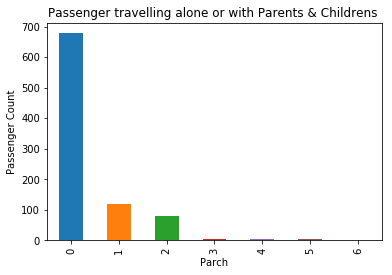

In [83]:
# Parch Data Study
# Parch - Children/Parents
plt = train.Parch.value_counts().sort_index().plot('bar', title = 'Passenger travelling alone or with Parents & Childrens ')
plt.set_xlabel('Parch')
plt.set_ylabel('Passenger Count')

In [84]:
# Parch - Number of parents and childrens travelling along with passenger
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

Text(0,0.5,'Survival Probability')

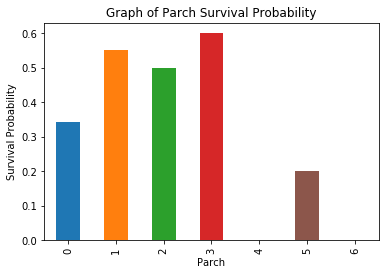

In [85]:
#Parch Survival Probability
plt = train.groupby('Parch').mean().Survived.plot('bar', title = 'Graph of Parch Survival Probability')
plt.set_xlabel('Parch')
plt.set_ylabel('Survival Probability')

In [86]:
# The passengers having three children/parents has more survival probability.
#'3' > '1' > '2' > '0' > '5'

Text(0,0.5,'Passenger Count')

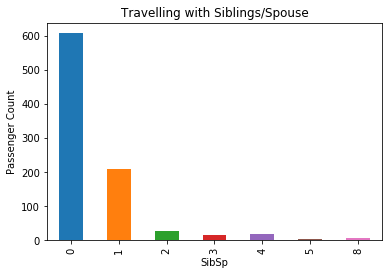

In [87]:
# SibSp Data Study
# SibSp - Siblings/Spouse
plt = train.SibSp.value_counts().sort_index().plot('bar', title = 'Travelling with Siblings/Spouse')
plt.set_xlabel('SibSp')
plt.set_ylabel('Passenger Count')

In [88]:
# As we can see majority of them have no siblings/Spouse

In [89]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

Text(0,0.5,'Survival Probability')

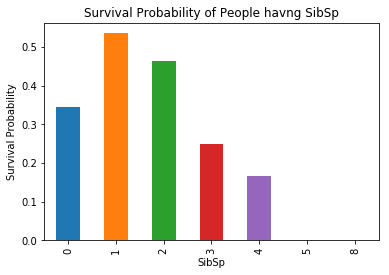

In [90]:
# More than 65% of the passengers travelling without a sibling or spouse died in the accident
# SibSp Survival Probability
plt = train.groupby('SibSp').mean().Survived.plot('bar', title = 'Survival Probability of People havng SibSp')
plt.set_xlabel('SibSp')
plt.set_ylabel('Survival Probability')

In [91]:
# The passengers having one sibling/spouse has more survival probability.
# '1' > '2' > '0' > '3' > '4'

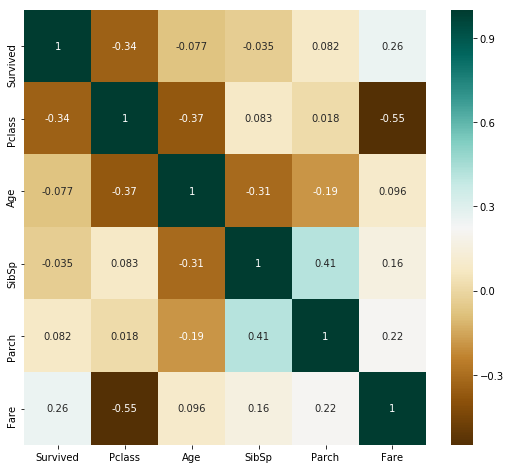

In [92]:
# UDERSTANDING CORRELATION BETWEEN TWO VARIABLES, WHETHER THEY ARE DIRECTLY OR INDIRECTLY RELATED TO EACH OTHER
import matplotlib.pyplot as plt
plt.figure(figsize = (9,8))
sns.heatmap(train.drop('PassengerId',axis = 1).corr(), cmap= 'BrBG', annot = True)

In [93]:
# Combining train, test data therefore changes can be done at once 
final_data = [train, test]

In [94]:
# CHANGING DATA TYPES
# Channging male and female to Binary Value
for i in final_data:
    i['Sex'] = i['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [95]:
# AGE has some missing values, can replace these value with mean or range of mean+std_dev and mean-std_dev
for i in final_data:
    avg_age = i['Age'].mean()
    i['Age'][np.isnan(i['Age'])]= avg_age
    i['Age']=i['Age'].astype(int)

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [96]:
# Embarked has missing values, therefore replace it with most common class(S)
for i in final_data:
    i['Embarked']=i['Embarked'].fillna('S')

In [97]:
# Convert categorical variables into numerical value
for i in final_data:
    i['Embarked'] = i['Embarked'].map({'S':1, 'C':2, 'Q':3}).astype('int')

In [98]:
# Fill missing value in Fare with median value:
for i in final_data:
    i['Fare']=i['Fare'].fillna(train['Fare'].median())

In [99]:
# Create one more variable (Family size - will contain family size of the passenger)
# Family_size = Parch + SibSp + 1
for i in final_data:
    i['Family'] = i['SibSp'] + i['Parch'] + 1

In [100]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,1,2
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,1,1


In [101]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,892,3,"Kelly, Mr. James",0,34,0,0,330911,7.8292,NaN,3,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7.0000,NaN,1,2
2,894,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9.6875,NaN,3,1
3,895,3,"Wirz, Mr. Albert",0,27,0,0,315154,8.6625,NaN,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12.2875,NaN,1,3


In [102]:
# Remove Ticket and Cabin column because Ticket dosent have any relation with person survival and Cabin has lot of Nan values
remove= ['Name','Ticket','Cabin']
train1 = train.drop(remove, axis = 1)
test1 = test.drop(remove, axis = 1)

In [103]:
train1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,0,3,0,22,1,0,7.2500,1,2
1,2,1,1,1,38,1,0,71.2833,2,2
2,3,1,3,1,26,0,0,7.9250,1,1
3,4,1,1,1,35,1,0,53.1000,1,2
4,5,0,3,0,35,0,0,8.0500,1,1


In [104]:
test1.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,892,3,0,34,0,0,7.8292,3,1
1,893,3,1,47,1,0,7.0000,1,2
2,894,2,0,62,0,0,9.6875,3,1
3,895,3,0,27,0,0,8.6625,1,1
4,896,3,1,22,1,1,12.2875,1,3


In [105]:
# Need to drop PassengerId from both train1 and test1
train1.drop('PassengerId', axis = 1).head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,0,22,1,0,7.2500,1,2
1,1,1,1,38,1,0,71.2833,2,2
2,1,3,1,26,0,0,7.9250,1,1
3,1,1,1,35,1,0,53.1000,1,2
4,0,3,0,35,0,0,8.0500,1,1


In [106]:
test1.drop('PassengerId', axis = 1).head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,3,0,34,0,0,7.8292,3,1
1,3,1,47,1,0,7.0000,1,2
2,2,0,62,0,0,9.6875,3,1
3,3,0,27,0,0,8.6625,1,1
4,3,1,22,1,1,12.2875,1,3


In [107]:
# Put - Survived column (DEPENDENT VARIABLE) in y_train1
#       Every column other than survived (INDEPENDENT VARIABLE) in X_train1
#       Keep all test column in new variable (PASSENGER_ID) X_test1

In [108]:
# Model Creation, before we move forward with model
# X_train1 - All independent columns which we need in the model, Drop unnecessary columns
# y_train1 - The dependent variable
# X_test1 - The dataset on which we want to make prediction

y_train1 = train1['Survived']
X_train1 = train1.drop('Survived', axis = 1)
X_test1 = test1

In [109]:
y_train1. shape

(891,)

In [110]:
X_train1.shape

(891, 9)

In [111]:
X_test1.shape

(418, 9)

In [112]:
# CREATING MODELS STEPS
#STEP1 - Importing the package
#STEP2 - Put the algorithm in a variable
#STEP3 - Fit the dependent variable(y_train1) and independent variable(X_train_1)
#STEP4 - Do prediction using predict function on X_test1
#STEP5 - get accuracy of the model using score function

In [113]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression()
mod.fit(X_train1, y_train1)
predict_log_reg = mod.predict(X_test1)
accuracy = round(mod.score(X_train1,y_train1)*100, 2)
print('Accuracy = ', str(accuracy))

Accuracy =  80.36


In [114]:
# SUPPORT VECTOR MACHINE(SVM)
from sklearn.svm import SVC, LinearSVC
mod = LinearSVC()
mod.fit(X_train1,y_train1)
predict_svc = mod.predict(X_test1)
accuracy_svc = mod.score(X_train1,y_train1)*100
print('Accuracy SVC = ', accuracy_svc)

Accuracy SVC =  73.84960718294052


In [115]:
# K Nearest Neighbour
# We will try value of KNN as 2,3 and 4

In [116]:
# K nearest neighbour with neighbour = 2
from sklearn.neighbors import  KNeighborsClassifier
mod = KNeighborsClassifier(n_neighbors = 2)
mod.fit(X_train1,y_train1)
pridict_KNN = mod.predict(X_test1)
accuracy_KNN = mod.score(X_train1, y_train1)*100
print('Accuracy KNN with 2 Neighbors = ', accuracy_KNN)

Accuracy KNN with 2 Neighbors =  80.47138047138047


In [117]:
mod = KNeighborsClassifier(n_neighbors = 3)
mod.fit(X_train1,y_train1)
predict_KNN = mod.predict(X_test1)
accuracy_knn = mod.score(X_train1, y_train1)*100
print('Accuracy KNN with 3 neighbours = ', accuracy_knn)

Accuracy KNN with 3 neighbours =  79.91021324354658


In [118]:
mod = KNeighborsClassifier(n_neighbors = 4)
mod.fit(X_train1,y_train1)
predict_KNN = mod.predict(X_test1)
accuracy_knn = mod.score(X_train1,y_train1)*100
print('Accuracy KNN with 4 Neighbors = ', accuracy_knn)

Accuracy KNN with 4 Neighbors =  74.85970819304153


In [119]:
# DECISION TREE
#Decision Tree and Random Forest will definitely overfit as these consider all possible combinations of training dataset.
# Therefore Decision Tree accuracy is 100%

from sklearn.tree import DecisionTreeClassifier
mod = DecisionTreeClassifier()
mod.fit(X_train1,y_train1)
predict_DT = mod.predict(X_test1)
accuracy_DT = mod.score(X_train1,y_train1)*100
print('Accuracy of DT = ', accuracy_DT)

Accuracy of DT =  100.0


In [120]:
# RANDOM FOREST
# n_estimator is number of tree we want in the Forest
from sklearn.ensemble import RandomForestClassifier
mod = RandomForestClassifier(n_estimators = 50)
mod.fit(X_train1, y_train1)
predict_RF = mod.predict(X_test1)
accuracy_DT = mod.score(X_train1,y_train1)*100
print('Accuracy of DT = ', accuracy_DT)

Accuracy of DT =  99.88776655443323


In [121]:
# PERCEPTRON
from sklearn.linear_model import Perceptron
mod = Perceptron(max_iter = 5, tol = None)
mod.fit(X_train1,y_train1)
predict_Perception = mod.predict(X_test1)
accuracy_Perceptron = mod.score(X_train1,y_train1)*100
print('Accuracy of Perceptron = ', accuracy_Perceptron)

Accuracy of Perceptron =  63.41189674523008


In [122]:
# Hence Algos tried: Logistic Regression, SVM, KNN, Decision Tree, Random Forest, Perceptron
# We will make submission using Decision Tree
#  We need to get the predict_RF column from the model and combine it with PassengerId from the test datset

In [123]:
submission = pd.DataFrame({
        "PassengerId" : test["PassengerId"],
        "Survived" : predict_DT
    })
submission.to_csv('titanic_pred.csv', index = False)


In [124]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
